#### Compare the performance of several asset classes
You can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [1]:
#libraries
import pandas as pd 
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

In [3]:
#Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index,
#then assign the result to prices
prices = pd.read_csv('datasets/Stock_data-/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices 
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [4]:
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [6]:
#Select the first price for each series using .iloc[0] on prices and assign the result to first_prices
first_prices=prices.iloc[0]

first_prices

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

In [9]:
#Divide prices by first_prices, multiply by 100 and assign the result to normalized.
normalized = prices.div(first_prices).mul(100)
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


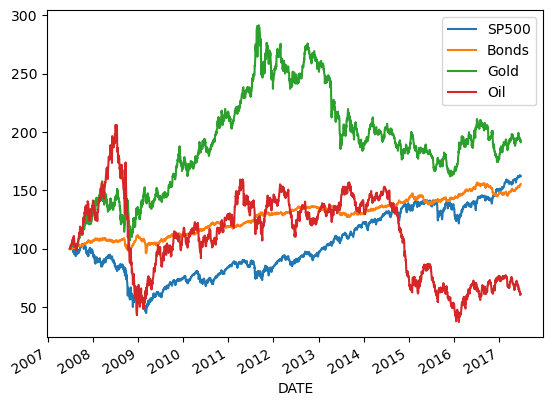

In [10]:
# Plot normalized
normalized.plot()
plt.show()